In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the CSV file into a DataFrame

df = pd.read_csv('Saas_companies_2025.csv')

In [ ]:
# Get an overview of the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company Name    100 non-null    object 
 1   Founded Year    100 non-null    int64  
 2   HQ              100 non-null    object 
 3   Industry        100 non-null    object 
 4   Total Funding   98 non-null     object 
 5   ARR             100 non-null    object 
 6   Valuation       100 non-null    object 
 7   Child Company   12 non-null     object 
 8   Employees       100 non-null    int64  
 9   Top Investors   100 non-null    object 
 10  Product         100 non-null    object 
 11  G2 Rating       100 non-null    float64
dtypes: float64(1), int64(2), object(9)
memory usage: 9.5+ KB


In [ ]:
# Fill missing values with empty strings

df.fillna('', inplace=True)
df.isnull().sum()

Company Name      0
Founded Year      0
HQ                0
Industry          0
Total Funding     0
ARR               0
Valuation         0
Child Company     0
Employees         0
Top Investors     0
Product           0
G2 Rating         0
dtype: int64

In [ ]:
# Find duplicate rows

print(f"\nDuplicated: {df.duplicated().sum()}")


Duplicated: 0


In [ ]:
# Change column names to lowercase, strip whitespace, and replace spaces with underscores

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
for col in df.columns:
    print(f"{col}")


company_name
founded_year
hq
industry
total_funding
arr
valuation
child_company
employees
top_investors
product
g2_rating


In [ ]:
# Convert funding amounts to a numerical format in millions

def convert_funding_to_millions(funding_str):
    """
    Converts a funding string (e.g., '10K', '1B', '65.4M', '273M')
    into a numerical value representing millions.
    """
    if not isinstance(funding_str, str):
        # If it's already a number, assume it's in a base unit and convert to millions
        return funding_str / 1_000_000

    funding_str = funding_str.strip().upper()  # Normalize the string

    # Handle different suffixes for funding amounts
    if funding_str.endswith('K'):
        return float(funding_str[:-1]) / 1_000
    
    elif funding_str.endswith('M'):
        return float(funding_str[:-1])
    
    elif funding_str.endswith('B'):
        return float(funding_str[:-1]) * 1_000
    
    else:
        try:
            return float(funding_str) / 1_000_000
        except ValueError:
            return None 

# Apply the conversion function to the 'funding' column
df['total_funding'] = df['total_funding'].apply(convert_funding_to_millions)

# Check the conversion
print("\nTotal Funding Converted to Millions:")
print(df['total_funding'].head())


Total Funding Converted to Millions:
0    1000.000
1      65.400
2       2.500
3       0.002
4         NaN
Name: total_funding, dtype: float64


In [ ]:
# Convert ARR (Annual Recurring Revenue) to billions

def convert_arr_to_billions(arr_str):
    """
    Converts an ARR string (e.g., '270B', '400M', '65.4M', '273M')
    into a numerical value representing billions.
    """
    if not isinstance(arr_str, str):
        # If it's already a number, assume it's in a base unit and convert to billions
        return arr_str / 1_000_000_000

    arr_str = arr_str.strip().upper()  # Normalize the string

    # Handle different suffixes for ARR amounts
    if arr_str.endswith('B'):
        return float(arr_str[:-1])
    
    elif arr_str.endswith('M'):
        return float(arr_str[:-1]) / 1_000
    
    else:
        try:
            return float(arr_str) / 1_000_000_000
        except ValueError:
            return None

# Apply the conversion function to the 'arr' column
df['arr'] = df['arr'].apply(convert_arr_to_billions)

# Check the conversion
print("\nARR Converted to Billions:")
print(df['arr'].head())


ARR Converted to Billions:
0    270.0
1     37.9
2     19.4
3     52.9
4     32.5
Name: arr, dtype: float64


In [ ]:
# Convert valuation to billions

def convert_valuation_to_billions(valuation_str):
    """
    Converts an ARR string (e.g., '3T', '95B')
    into a numerical value representing billions.
    """
    if not isinstance(valuation_str, str):
        # If it's already a number, assume it's in a base unit and convert to billions
        return valuation_str / 1_000_000_000

    valuation_str = valuation_str.strip().upper()  # Normalize the string

    # Handle different suffixes for valuation amounts
    if valuation_str.endswith('T'):
        return float(valuation_str[:-1]) * 1_000
    
    elif valuation_str.endswith('B'):
        return float(valuation_str[:-1])
    
    elif valuation_str.endswith('M'):
        return float(valuation_str[:-1]) / 1_000
    
    else:
        try:
            return float(valuation_str) / 1_000_000_000
        except ValueError:
            return None
        
# Apply the conversion function to the 'valuation' column
df['valuation'] = df['valuation'].apply(convert_valuation_to_billions)

# Check the conversion
print("\nValuation Converted to Billions:")
print(df['valuation'].head())


Valuation Converted to Billions:
0    3000.0
1     227.8
2     240.0
3     350.0
4     215.0
Name: valuation, dtype: float64


In [ ]:
# Rename columns for clarity

df.rename(columns={'total_funding': 'total_funding(M)'}, inplace=True)
df.rename(columns={'arr': 'arr(B)'}, inplace=True)
df.rename(columns={'valuation': 'valuation(B)'}, inplace=True)

In [ ]:
# Save the updated DataFrame to a new CSV file

df.to_csv('Saas_companies_2025_updated.csv', index=False)

In [ ]:
# claculate the number of outliers for each numeric column

numeric_cols = ["total_funding(M)", "arr(B)", "valuation(B)", "founded_year", "employees"]

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    print(f"{col}: {((df[col] < lower) | (df[col] > upper)).sum()} outliers")


total_funding(M): 5 outliers
arr(B): 12 outliers
valuation(B): 15 outliers
founded_year: 5 outliers
employees: 11 outliers


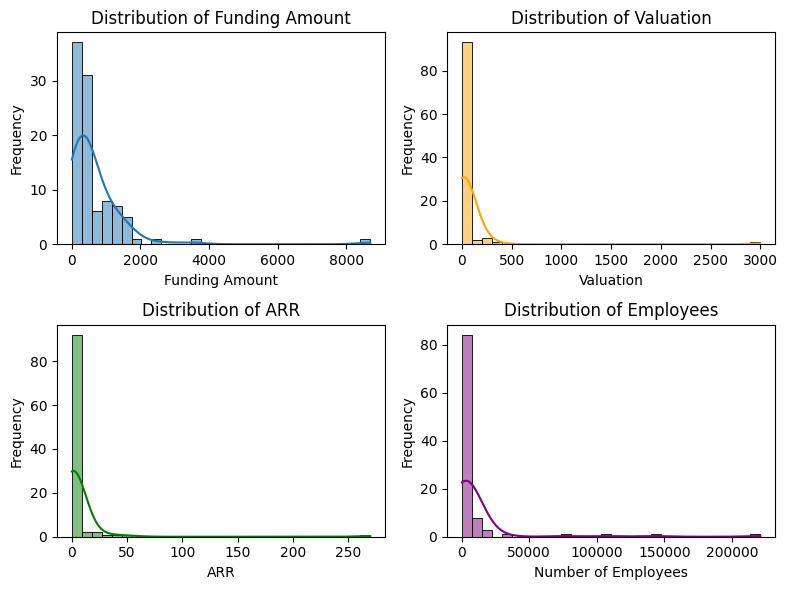

In [14]:
# Combine all histograms into one page
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Funding Amount
sns.histplot(df['total_funding(M)'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Funding Amount')
axes[0, 0].set_xlabel('Funding Amount')
axes[0, 0].set_ylabel('Frequency')

# Valuation
sns.histplot(df['valuation(B)'], bins=30, kde=True, color='orange', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Valuation')
axes[0, 1].set_xlabel('Valuation')
axes[0, 1].set_ylabel('Frequency')

# ARR
sns.histplot(df['arr(B)'], bins=30, kde=True, color='green', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of ARR')
axes[1, 0].set_xlabel('ARR')
axes[1, 0].set_ylabel('Frequency')

# Employees
sns.histplot(df['employees'], bins=30, kde=True, color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Employees')
axes[1, 1].set_xlabel('Number of Employees')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

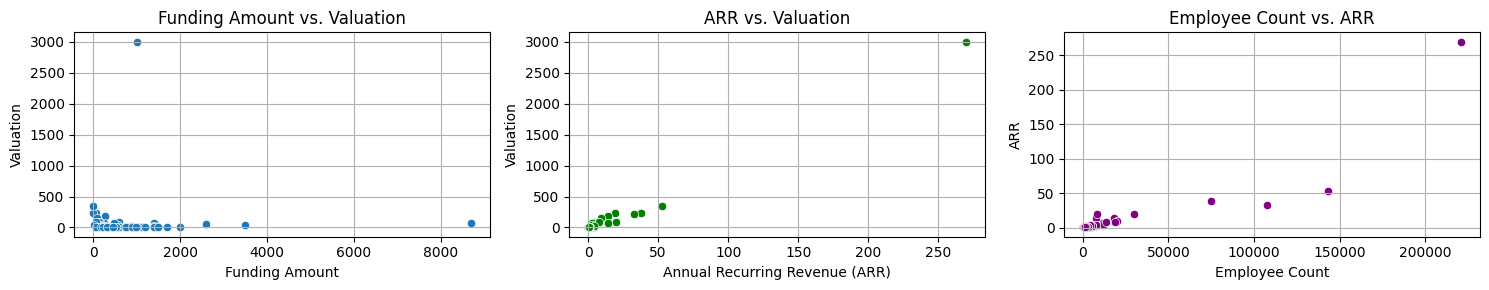

In [18]:
# combine all scatter plots into one page
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

# Funding Amount vs. Valuation
sns.scatterplot(data=df, x="total_funding(M)", y="valuation(B)", ax=axes[0])
axes[0].set_title("Funding Amount vs. Valuation")
axes[0].set_xlabel("Funding Amount")
axes[0].set_ylabel("Valuation")
axes[0].grid(True)

# ARR vs. Valuation
sns.scatterplot(data=df, x="arr(B)", y="valuation(B)", color="green", ax=axes[1])
axes[1].set_title("ARR vs. Valuation")
axes[1].set_xlabel("Annual Recurring Revenue (ARR)")
axes[1].set_ylabel("Valuation")
axes[1].grid(True)

# Employee Count vs. ARR
sns.scatterplot(data=df, x="employees", y="arr(B)", color="purple", ax=axes[2])
axes[2].set_title("Employee Count vs. ARR")
axes[2].set_xlabel("Employee Count")
axes[2].set_ylabel("ARR")
axes[2].grid(True)

plt.tight_layout()
plt.show()

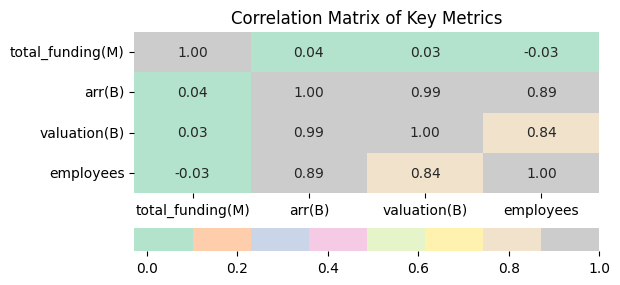

In [16]:
# Select numeric columns of interest
corr_cols = ["total_funding(M)", "arr(B)", "valuation(B)", "employees"]

# Compute correlation matrix
corr_matrix = df[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(corr_matrix, annot=True, cmap="Pastel2", fmt=".2f", cbar_kws={'orientation': 'horizontal'})
plt.title("Correlation Matrix of Key Metrics")
plt.show()


C:\Users\HETVI\AppData\Local\Temp\ipykernel_4860\2946051890.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_funding.values, y=top_funding.index, palette="crest")


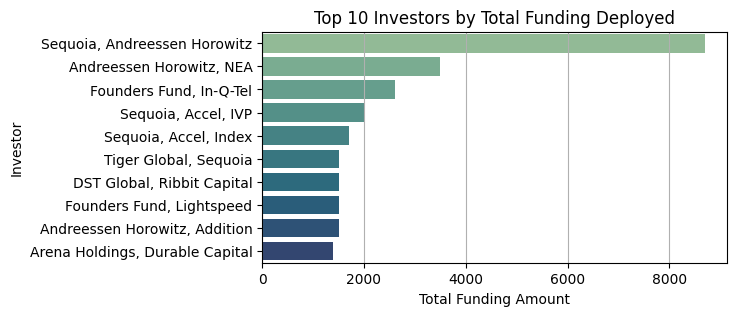

In [17]:
# visualizing top 10 investors by total funding deployed

df_exploded = df.assign(investor=df["top_investors"].str.split(",")).explode("top_investors")
df_exploded["top_investors"] = df_exploded["top_investors"].str.strip()
top_funding = df_exploded.groupby("top_investors")["total_funding(M)"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(6, 3))
sns.barplot(x=top_funding.values, y=top_funding.index, palette="crest")
plt.title("Top 10 Investors by Total Funding Deployed")
plt.xlabel("Total Funding Amount")
plt.ylabel("Investor")
plt.grid(True, axis='x')
plt.show()
